In [36]:
#安装数据获取的api
!pip install tushare


In [143]:
import tushare as ts
ts.set_token('your token here')

pro = ts.pro_api()

df = pro.index_daily(ts_code='399300.SZ')#沪深300

In [30]:
#df = pro.index_daily(ts_code='399300.SZ', start_date='20180101', end_date='20181010')


In [144]:
df

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,399300.SZ,20211022,4959.7254,4934.8698,4989.8870,4934.8698,4928.0156,31.7098,0.6435,1.439262e+08,2.892526e+08
1,399300.SZ,20211021,4928.0156,4914.7378,4946.1764,4893.8525,4910.1846,17.8310,0.3631,1.488982e+08,2.748030e+08
2,399300.SZ,20211020,4910.1846,4926.7727,4944.0216,4898.3651,4922.7232,-12.5386,-0.2547,1.415332e+08,2.797477e+08
3,399300.SZ,20211019,4922.7232,4869.3907,4928.1433,4868.8106,4874.7753,47.9479,0.9836,1.352665e+08,2.829282e+08
4,399300.SZ,20211018,4874.7753,4922.5137,4922.5137,4844.9383,4932.1084,-57.3331,-1.1624,1.412452e+08,3.025394e+08
...,...,...,...,...,...,...,...,...,...,...,...
4077,399300.SZ,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
4078,399300.SZ,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
4079,399300.SZ,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
4080,399300.SZ,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06


In [145]:
df = df[::-1].reset_index()

In [146]:
df

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,4081,399300.SZ,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06
1,4080,399300.SZ,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
2,4079,399300.SZ,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
3,4078,399300.SZ,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
4,4077,399300.SZ,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
4077,4,399300.SZ,20211018,4874.7753,4922.5137,4922.5137,4844.9383,4932.1084,-57.3331,-1.1624,1.412452e+08,3.025394e+08
4078,3,399300.SZ,20211019,4922.7232,4869.3907,4928.1433,4868.8106,4874.7753,47.9479,0.9836,1.352665e+08,2.829282e+08
4079,2,399300.SZ,20211020,4910.1846,4926.7727,4944.0216,4898.3651,4922.7232,-12.5386,-0.2547,1.415332e+08,2.797477e+08
4080,1,399300.SZ,20211021,4928.0156,4914.7378,4946.1764,4893.8525,4910.1846,17.8310,0.3631,1.488982e+08,2.748030e+08


In [147]:
import pandas as pd
df["Date"] = pd.to_datetime(df["trade_date"])#将字符串转换成日期

In [148]:
df["weekday"] = df["Date"].dt.dayofweek#日期转换成星期

In [149]:
set(df["weekday"])

{0, 1, 2, 3, 4}

In [150]:
#统计‍各个工作日的均值与涨跌特征
result = df.groupby("weekday")["pct_chg"].describe()
tmp1 = df.groupby("weekday")["pct_chg"].size()#星期个数统计
tmp2 = df[df["pct_chg"]>0].groupby("weekday")["pct_chg"].size()#上涨星期统计
result["success_rate"] = tmp2/tmp1
result.T

weekday,0,1,2,3,4
count,797.000000,821.000000,829.000000,822.000000,813.000000
mean,0.180544,0.013758,0.085892,-0.107176,0.098623
std,2.048196,1.570551,1.593049,1.607178,1.558436
min,-8.747700,-9.239800,-6.761300,-7.294500,-7.868300
25%,-0.755200,-0.628800,-0.688100,-0.873975,-0.644600
50%,0.272300,0.134300,0.027400,-0.086750,0.124400
75%,1.287600,0.814900,0.808500,0.684750,0.848200
max,8.271700,6.714700,8.180200,9.287900,9.342000
success_rate,0.584693,0.563946,0.512666,0.457421,0.555966


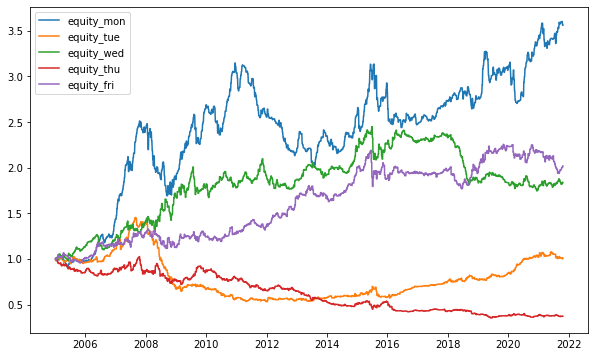

In [151]:
import matplotlib.pylab as plt

mon_df = df[df["weekday"]==0].copy()
tue_df = df[df["weekday"]==1].copy()
wed_df = df[df["weekday"]==2].copy()
thu_df = df[df["weekday"]==3].copy()
fri_df = df[df["weekday"]==4].copy()


mon_df["equity_mon"] = (mon_df["pct_chg"]/100+1).cumprod()
tue_df["equity_tue"] = (tue_df["pct_chg"]/100+1).cumprod()
wed_df["equity_wed"] = (wed_df["pct_chg"]/100+1).cumprod()
thu_df["equity_thu"] = (thu_df["pct_chg"]/100+1).cumprod()
fri_df["equity_fri"] = (fri_df["pct_chg"]/100+1).cumprod()

temp = df.copy()

temp["equity_mon"] = mon_df["equity_mon"].copy()
temp["equity_tue"] = tue_df["equity_tue"].copy()
temp["equity_wed"] = wed_df["equity_wed"].copy() 
temp["equity_thu"] = thu_df["equity_thu"].copy()
temp["equity_fri"] = fri_df["equity_fri"].copy()

equity_list = ["equity_mon", "equity_tue", "equity_wed", "equity_thu", "equity_fri"]

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

for i in equity_list:
  temp[i] = temp[i].astype("object")
  temp[i].fillna(method = "ffill", inplace = True)
  temp[i] = temp[i].astype("object")
  temp[i].fillna(value = 1, inplace = True)
  ax1.plot(temp["Date"], temp[i], label = i)
ax1.legend(loc = "best")
plt.show()

In [152]:
temp

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,Date,weekday,equity_mon,equity_tue,equity_wed,equity_thu,equity_fri
0,4081,399300.SZ,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,2005-01-04,1,1.000000,0.982794,1.000000,1.000000,1.000000
1,4080,399300.SZ,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,2005-01-05,2,1.000000,0.982794,1.009941,1.000000,1.000000
2,4079,399300.SZ,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,2005-01-06,3,1.000000,0.982794,1.009941,0.990540,1.000000
3,4078,399300.SZ,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,2005-01-07,4,1.000000,0.982794,1.009941,0.990540,1.000797
4,4077,399300.SZ,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,2005-01-10,0,1.010083,0.982794,1.009941,0.990540,1.000797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,4,399300.SZ,20211018,4874.7753,4922.5137,4922.5137,4844.9383,4932.1084,-57.3331,-1.1624,1.412452e+08,3.025394e+08,2021-10-18,0,3.559659,1.000760,1.839610,0.370988,2.006544
4078,3,399300.SZ,20211019,4922.7232,4869.3907,4928.1433,4868.8106,4874.7753,47.9479,0.9836,1.352665e+08,2.829282e+08,2021-10-19,1,3.559659,1.010604,1.839610,0.370988,2.006544
4079,2,399300.SZ,20211020,4910.1846,4926.7727,4944.0216,4898.3651,4922.7232,-12.5386,-0.2547,1.415332e+08,2.797477e+08,2021-10-20,2,3.559659,1.010604,1.834925,0.370988,2.006544
4080,1,399300.SZ,20211021,4928.0156,4914.7378,4946.1764,4893.8525,4910.1846,17.8310,0.3631,1.488982e+08,2.748030e+08,2021-10-21,3,3.559659,1.010604,1.834925,0.372335,2.006544


In [ ]:
mon_df = df[df["weekday"]==0].copy()
tue_df = df[df["weekday"]==1].copy()
wed_df = df[df["weekday"]==2].copy()
thu_df = df[df["weekday"]==3].copy()
fri_df = df[df["weekday"]==4].copy()

per_cost = 1000

mon_df["mon_holdings"] = per_cost/mon_df["close"]
tue_df["tue_holdings"] = per_cost/tue_df["close"]
wed_df["wed_holdings"] = per_cost/wed_df["close"]
thu_df["thu_holdings"] = per_cost/thu_df["close"]
fri_df["fri_holdings"] = per_cost/fri_df["close"]

temp = df.copy()
temp["mon_holdings"] = mon_df["mon_holdings"].copy()
temp["tue_holdings"] = tue_df["tue_holdings"].copy()
temp["wed_holdings"] = wed_df["wed_holdings"].copy() 
temp["thu_holdings"] = thu_df["thu_holdings"].copy()
temp["fri_holdings"] = fri_df["fri_holdings"].copy()


holdings_lists = [("mon_holdings", "mon_value"), 
("tue_holdings", "tue_value"),
("wed_holdings", "wed_value"),
("thu_holdings", "thu_value"),
("fri_holdings", "fri_value")]

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

for (i,j) in holdings_lists:
  temp[i] = temp[i].astype("object")
  temp[i].fillna(value = 0, inplace = True)
  temp[i] = temp[i].cumsum()
  temp[j] = temp[i]*temp["close"]
  ax1.plot(temp["Date"], temp[j], label = i)
ax1.legend(loc = "best")
plt.show()